In [1]:
import pandas as pd
import pickle

In [2]:
# patch_responses = pd.read_csv('df_pd_final.csv', usecols= ['upstream', 'responses.message'])
# patch_responses.dropna(inplace=True, subset=['upstream'])
with open('df_with_patch_object.pickle', 'rb') as f:
    patch_responses = pickle.load(f)
patch_responses.head()

,patch_id,response_author,resp_parent,resp_msg_id,upstream,response_is_bot,bot_name,patch_author,responder,self_response,email,Patch
0,<0-v1-0bc346e08476+585-drop_offsetofend_jgg@me...,Jason Gunthorpe <jgg@ziepe.ca>,<0-v1-0bc346e08476+585-drop_offsetofend_jgg@me...,<20200529182915.GA18558@ziepe.ca>,NaN,False,NaN,"('jason gunthorpe', 'jgg@ziepe.ca')","('jason gunthorpe', 'jgg@ziepe.ca')",True,"[Return-Path, X-Spam-Checker-Version, X-Spam-L...",None
1,<0-v1-0bc346e08476+585-drop_offsetofend_jgg@me...,Jason Gunthorpe <jgg@ziepe.ca>,<0-v1-0bc346e08476+585-drop_offsetofend_jgg@me...,<20200529182915.GA18558@ziepe.ca>,ffd7339a2fac98b9ff731e336c4411bf1ce57e22,False,NaN,"('jason gunthorpe', 'jgg@ziepe.ca')","('jason gunthorpe', 'jgg@ziepe.ca')",True,"[Return-Path, X-Spam-Checker-Version, X-Spam-L...",None
2,<0-v1-4eb72686de3c+5062-hmm_no_flags_jgg@mella...,Jason Gunthorpe <jgg@ziepe.ca>,<0-v1-4eb72686de3c+5062-hmm_no_flags_jgg@mella...,<2-v1-4eb72686de3c+5062-hmm_no_flags_jgg@mella...,NaN,False,NaN,"('jason gunthorpe', 'jgg@ziepe.ca')","('jason gunthorpe', 'jgg@ziepe.ca')",True,"[Return-Path, X-Spam-Checker-Version, X-Spam-L...",<pypasta.Repository.Mbox.PatchMail object at 0...
3,<0-v1-4eb72686de3c+5062-hmm_no_flags_jgg@mella...,Ralph Campbell <rcampbell@nvidia.com>,<0-v1-4eb72686de3c+5062-hmm_no_flags_jgg@mella...,<17ce2fdc-4f9f-7772-c10c-6f339a4183e8@nvidia.com>,NaN,False,NaN,"('jason gunthorpe', 'jgg@ziepe.ca')","('ralph campbell', 'rcampbell@nvidia.com')",False,"[Return-Path, X-Spam-Checker-Version, X-Spam-L...",None
4,<0-v1-4eb72686de3c+5062-hmm_no_flags_jgg@mella...,Jason Gunthorpe <jgg@ziepe.ca>,<0-v1-4eb72686de3c+5062-hmm_no_flags_jgg@mella...,<3-v1-4eb72686de3c+5062-hmm_no_flags_jgg@mella...,NaN,False,NaN,"('jason gunthorpe', 'jgg@ziepe.ca')","('jason gunthorpe', 'jgg@ziepe.ca')",True,"[Return-Path, X-Spam-Checker-Version, X-Spam-L...",<pypasta.Repository.Mbox.PatchMail object at 0...


In [3]:
patch_responses.shape

(6221622, 12)

In [4]:
patch_responses = patch_responses.sample(20000)

In [5]:
import email

def get_message_date(msg):
    try:
        return pd.to_datetime(msg['Date']).date()
    except:
        return None

patch_responses['responses.date'] = patch_responses['email'].map(get_message_date)
# patch_responses.sort_values('responses.date', ascending=False).head()

,patch_id,response_author,resp_parent,resp_msg_id,upstream,response_is_bot,bot_name,patch_author,responder,self_response,email,Patch,responses.date
177569,<20200717092104.15428-1-zhukeqian1@huawei.com>,Marc Zyngier <maz@kernel.org>,<20200717092104.15428-1-zhukeqian1@huawei.com>,<3a95ec8ce3e34d86c09f9b1b4f17d0ad@kernel.org>,NaN,False,NaN,"('keqian zhu', 'zhukeqian1@huawei.com')","('marc zyngier', 'maz@kernel.org')",False,"[Return-Path, X-Spam-Checker-Version, X-Spam-L...",<pypasta.Repository.Mbox.PatchMail object at 0...,2020-07-28
189411,<03aa26eb5be1c558e3048a3b4ff3214856d5c490.1594...,Dave Stevenson <dave.stevenson@raspberrypi.com>,<03aa26eb5be1c558e3048a3b4ff3214856d5c490.1594...,<CAPY8ntDeMAuDb1ZWj59+14ZQVqDjM7X+E312Lymm0P8L...,NaN,False,NaN,"('maxime ripard', 'maxime@cerno.tech')","('dave stevenson', 'dave.stevenson@raspberrypi...",False,"[Return-Path, X-Spam-Checker-Version, X-Spam-L...",None,2020-07-28
171648,<20200629092633.24545-1-patrice.chotard@st.com>,Patrice CHOTARD <patrice.chotard@st.com>,<20200629092633.24545-1-patrice.chotard@st.com>,<7a656b7e-4a15-4bd6-54ba-6dc87f2c9b81@st.com>,NaN,False,NaN,"('patrice chotard', 'patrice.chotard@st.com')","('patrice chotard', 'patrice.chotard@st.com')",True,"[Return-Path, X-Original-To, Delivered-To, Rec...",None,2020-07-28
179363,<20200724182328.3348-4-krzk@kernel.org>,Krzysztof Kozlowski <krzk@kernel.org>,<20200724182328.3348-4-krzk@kernel.org>,<20200727081626.GG17644@kozik-lap>,NaN,False,NaN,"('krzysztof kozlowski', 'krzk@kernel.org')","('krzysztof kozlowski', 'krzk@kernel.org')",True,"[Return-Path, X-Spam-Checker-Version, X-Spam-L...",None,2020-07-27
184571,<87wo2qwp2s.wl-maz@kernel.org>,Saravana Kannan <saravanak@google.com>,<87wo2qwp2s.wl-maz@kernel.org>,<CAGETcx8dAki1pX7yspd+7USxrdhx3uHy=m1ej-J52xh=...,NaN,False,NaN,"('marc zyngier', 'maz@kernel.org')","('saravana kannan', 'saravanak@google.com')",False,"[Return-Path, X-Spam-Checker-Version, X-Spam-L...",None,2020-07-27


In [6]:
from pypasta.Repository.Repository import Repository

repo = Repository('./resources/linux/repo')

def get_commit_object(upstream):
    try:
        return repo.get_commit(upstream)
    except:
        return None

def get_author_name(commit):
    try:
        return commit.author.name
    except:
        return None
    
def get_author_email(commit):
    try:
        return commit.author.email
    except:
        return None

def get_changed_lines(commit):
    try:
        return commit.diff.lines
    except:
        return None

def get_patches(commit):
    try:
        return len(commit.diff.patches)
    except:
        return None

def get_date(commit):
    try:
        return commit.committer.date.date()
    except:
        return None

def get_revert(commit):
    try:
        return commit.is_revert
    except:
        return None

In [7]:
upstream = patch_responses[['upstream']].drop_duplicates(keep = False)

In [8]:
upstream['commit'] = upstream['upstream'].apply(get_commit_object)

In [9]:
upstream['author.email'] = upstream['commit'].apply(get_author_email)

In [10]:
upstream['Name'] = upstream['commit'].apply(get_author_name)

In [11]:
upstream['date'] = upstream['commit'].apply(get_date)

In [12]:
def get_tags(commit, tag):
    try:
        results = commit.tags[tag]
        if len(results):
            return results
        return None
    except:
        return None

def get_number_of_tags(commit, tag):
    try:
        return len(commit.tags[tag])
    except:
        return 0

In [13]:
upstream['n_reviewers'] = upstream['commit']\
                                .apply(lambda x: get_number_of_tags(x, 'reviewed-by'))

In [14]:
upstream['reported-by'] = upstream['commit']\
                                .apply(lambda x: get_tags(x, 'reported-by'))

In [15]:
# upstream['n_reported-by'] = upstream['commit']\
#                                 .apply(lambda x: get_number_of_tags(x, 'reported-by'))

In [16]:
# upstream['n_fixes'] = upstream['commit']\
#                                 .apply(lambda x: get_number_of_tags(x, 'fixes'))

In [17]:
upstream['lines'] = upstream['commit'].apply(get_changed_lines)

In [18]:
upstream['n_patches'] = upstream['commit'].apply(get_patches)

In [19]:
upstream['is_revert'] = upstream['commit'].apply(get_revert)

In [20]:
upstream.sort_values('date', ascending=False).head()

,upstream,commit,author.email,Name,date,n_reviewers,reported-by,n_reported-by,n_fixes,lines,n_patches,is_revert
1733375,062d3f95b630113e1156a31f376ad36e25da29a7,<pypasta.Repository.Repository.Commit object a...,chris@chris-wilson.co.uk,Chris Wilson,2020-07-24,0,None,0,0,1,1,False
1356221,7df5cb75cfb8acf96c7f2342530eb41e0c11f4c3,<pypasta.Repository.Repository.Commit object a...,subashab@codeaurora.org,Subash Abhinov Kasiviswanathan,2020-07-24,0,None,0,1,2,1,False
2813802,d38a2b7a9c939e6d7329ab92b96559ccebf7b135,<pypasta.Repository.Repository.Commit object a...,songmuchun@bytedance.com,Muchun Song,2020-07-24,1,None,0,1,35,1,False
4703567,7359608a271ce81803de148befefd309baf88c76,<pypasta.Repository.Repository.Commit object a...,sgarzare@redhat.com,Stefano Garzarella,2020-07-24,2,None,0,1,2,1,False
5281728,bb9715379abfeddea86343b748b62410e20ef037,<pypasta.Repository.Repository.Commit object a...,andreyknvl@google.com,Andrey Konovalov,2020-07-24,0,None,0,0,11,1,False


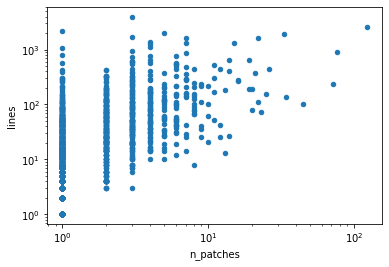

In [21]:
upstream.plot.scatter(x = 'n_patches', y = 'lines', logx =True, logy=True)

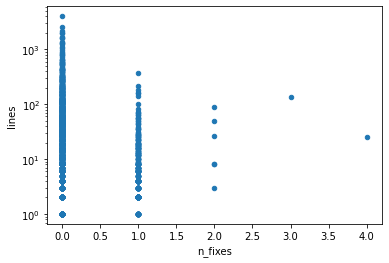

In [22]:
upstream.plot.scatter(x = 'n_fixes', y = 'lines', logy = True)

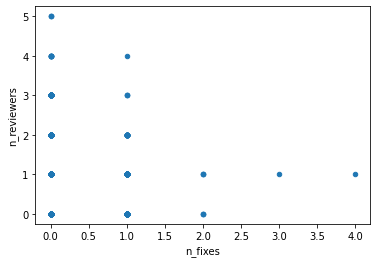

In [23]:
upstream.plot.scatter(x = 'n_fixes', y = 'n_reviewers')

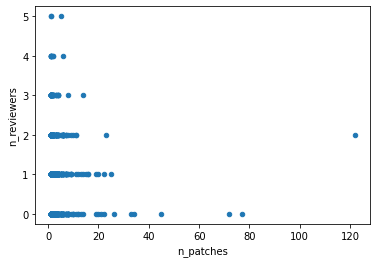

In [24]:
upstream.plot.scatter(x = 'n_patches', y = 'n_reviewers')

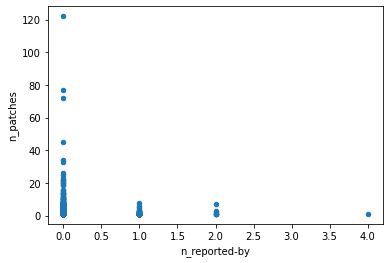

In [25]:
upstream.plot.scatter(x = 'n_reported-by', y = 'n_patches')

## Review coverage percentage
Simply the ratio of the number of reviewers to the number of changed lines for each upstream commit. 1 reviewer for each changed line would mean 100% coverage. Therefore the coverage percentage measure is allowed to exceed 100%.

In [26]:
def coverage(row):
    if row.n_reviewers:
        return (row.n_reviewers/row.lines)*100
    else:
        return 0

In [27]:
upstream['coverage(%)'] =  upstream.apply(coverage, axis=1)

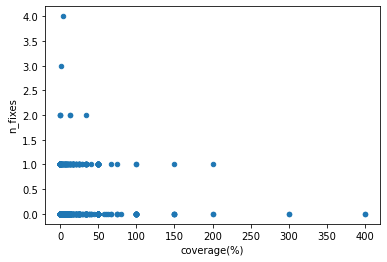

In [28]:
upstream.plot.scatter(x = 'coverage(%)', y = 'n_fixes')

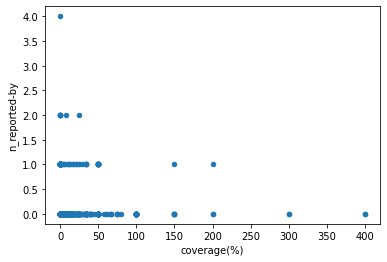

In [29]:
upstream.plot.scatter(x = 'coverage(%)', y = 'n_reported-by')

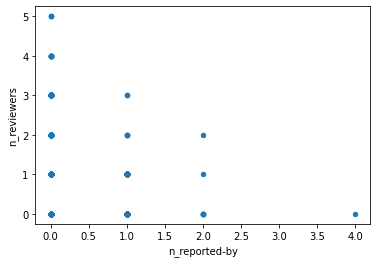

In [30]:
upstream.plot.scatter(x = 'n_reported-by', y = 'n_reviewers')

In [31]:
len(upstream[upstream.is_revert])/len(upstream)*100

0.8403361344537815

## Author Activity Percentage
Measure percentage of the commits in the dataset were made by the author. An author activity of 100% would mean that every commit in the release window we have taken was made by that author.

In [32]:
upstream['upstream'].nunique()

1428

In [33]:
author_counts = dict(upstream[upstream['Name'].notna()][['Name', 'upstream']].groupby('Name').nunique()['upstream'])
num_commits = upstream['upstream'].nunique()

def author_activity(author):
    try:
        return (author_counts[author]/num_commits)*100
    except:
        return 0
upstream['author_activity(%)'] = upstream['Name'].apply(author_activity)

In [34]:
upstream.head()

,upstream,commit,author.email,Name,date,n_reviewers,reported-by,n_reported-by,n_fixes,lines,n_patches,is_revert,coverage(%),author_activity(%)
5198825,25f1ca31e230598eaf3c38d387a355a64bd772a7,<pypasta.Repository.Repository.Commit object a...,mika.westerberg@linux.intel.com,Mika Westerberg,2020-04-24,1,None,0,0,1322,15,False,0.075643,0.490196
6000284,5a892ff2facb4548c17c05931ed899038a0da63e,<pypasta.Repository.Repository.Commit object a...,hch@lst.de,Christoph Hellwig,2020-05-29,1,None,0,0,33,2,False,3.030303,1.960784
2099199,02f6efb47856cd239a9e4104e26a41ec61887bb0,<pypasta.Repository.Repository.Commit object a...,Emily.Deng@amd.com,Emily Deng,2020-04-01,1,None,0,0,3,1,False,33.333333,0.070028
2798139,ce9a9321c11817e54ab36d75c2fab62537fcc993,<pypasta.Repository.Repository.Commit object a...,bvanassche@acm.org,Bart Van Assche,2020-05-26,3,None,0,0,41,1,False,7.317073,0.420168
1159444,980737282232b752bb14dab96d77665c15889c36,<pypasta.Repository.Repository.Commit object a...,alexey.budankov@linux.intel.com,Alexey Budankov,2020-04-16,0,None,0,0,16,3,False,0.000000,0.280112


In [35]:
# upstream.plot.scatter(x = 'author_activity(%)', y = 'n_reported-by')

In [36]:
# upstream.plot.scatter(x = 'author_activity(%)', y = 'n_fixes')

In [37]:
# upstream.plot.scatter(x = 'author_activity(%)', y = 'n_reviewers')

In [38]:
# developer_rankings = pd.read_csv('developers_v5.6..v5.7.csv')
# developer_rankings.head()

In [39]:
# authors = pd.merge(upstream.groupby('Name').count().reset_index(), developer_rankings, on='Name', how='left')
# authors.head(10)

In [40]:
# len(authors)

In [41]:
# len(authors.dropna(how='any'))

In [42]:
# authors.plot.scatter(x='reported-by', y='Changed Lines', logy=True)

In [43]:
# pd.plotting.scatter_matrix(authors, figsize=(15, 15))

## Code complexity

Radon only works for .py files but relatively easier to use

https://radon.readthedocs.io/en/latest/api.html#module-radon.complexity

For everything else

https://github.com/terryyin/lizard

In [44]:
from radon.visitors import ComplexityVisitor

In [45]:
v = ComplexityVisitor.from_code('''
def factorial(n):
    if n < 2: return 1
    return n * factorial(n - 1)

def foo(bar):
    return sum(i for i in range(bar ** 2) if bar % i)
''')

v.complexity

1

We only get the complexity value for the functions in the code chunk, if there are multiple functions in the code chunk, I return the avarage. Quite often there are no function definition covered completely in the patch so we do not get any results. This is probably not a good measure.

In [46]:
import statistics
import lizard

# We need to provide a file name to identify the language
# i = lizard.analyze_file.analyze_source_code("AllTests.cpp", "int foo(){}")

def insert_complexity(upstream):
    patches = repo.get_commit(upstream).diff.patches
    results = []
    for filename, patch in patches.items():
        for _, hunk in patch.hunks.items():
            if len(hunk.insertions):
                function_list = lizard.analyze_file.analyze_source_code(filename[0], '\n'.join(hunk.insertions)).function_list
                if len(function_list):
                    for function in function_list:
                        results.append(function.cyclomatic_complexity)
    if len(results):
        return statistics.mean(results)
    return None
    
# insert_complexity('60e50f34b13e9e40763be12aa55f2144d8da514c')

In [47]:
upstream['insert_complexity'] = upstream['upstream'].apply(insert_complexity)
upstream.sort_values('insert_complexity', ascending=False)

,upstream,commit,author.email,Name,date,n_reviewers,reported-by,n_reported-by,n_fixes,lines,n_patches,is_revert,coverage(%),author_activity(%),insert_complexity
216431,3ec6efa703cf65887e681d1f97d38a63261d907e,<pypasta.Repository.Repository.Commit object a...,darrick.wong@oracle.com,Darrick J. Wong,2020-05-08,2,None,0,0,258,2,False,0.775194,1.400560,19.0
1235212,c3e2fe9222d428f115baeba2f6b3637b3aa444cd,<pypasta.Repository.Repository.Commit object a...,dgilbert@interlog.com,Douglas Gilbert,2020-05-04,1,None,0,0,101,1,False,0.990099,0.140056,16.0
3549170,cd49291ce18aeef3f2ec950bc99bd72d5a05fa86,<pypasta.Repository.Repository.Commit object a...,andriin@fb.com,Andrii Nakryiko,2020-05-13,0,None,0,0,142,5,False,0.000000,0.280112,14.0
3743811,d3a8a9e5c3b334d443e97daa59bb95c0b69f4794,<pypasta.Repository.Repository.Commit object a...,doshir@vmware.com,Ronak Doshi,2020-05-28,0,None,0,0,274,4,False,0.000000,0.070028,12.0
4552354,736fc0e17fade807e59cd9001af88ec4bcca62ef,<pypasta.Repository.Repository.Commit object a...,shenjian15@huawei.com,Jian Shen,2020-04-20,0,None,0,0,285,1,False,0.000000,0.070028,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458696,d31275a9dc0baa6b084917f8d42f1e197239fe6c,<pypasta.Repository.Repository.Commit object a...,andriy.shevchenko@linux.intel.com,Andy Shevchenko,2020-04-17,1,None,0,0,10,1,False,10.000000,1.330532,NaN
2483440,72d24accf02add25e08733f0ecc93cf10fcbd88c,<pypasta.Repository.Repository.Commit object a...,ashimida@linux.alibaba.com,ashimida,2020-06-06,0,None,0,1,2,1,False,0.000000,0.070028,NaN
3353365,d0b1e4a638d670a09f42017a3e567dc846931ba8,<pypasta.Repository.Repository.Commit object a...,weiyongjun1@huawei.com,Wei Yongjun,2020-05-19,0,None,0,0,1,1,False,0.000000,0.280112,NaN
1274526,92efe48e8fe2b6848ca56e14436c2b7d20c986d4,<pypasta.Repository.Repository.Commit object a...,zhengdejin5@gmail.com,Dejin Zheng,2020-04-20,0,None,0,0,3,1,False,0.000000,0.210084,NaN


In [48]:
# upstream.plot.scatter(x ='insert_complexity' , y='author_activity(%)')

### Average inserted code complexity vs. review coverage in each commit

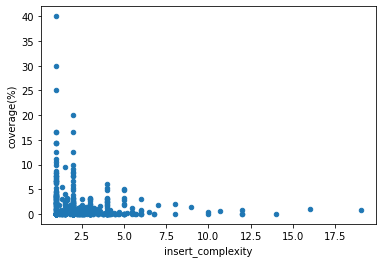

In [49]:
upstream.plot.scatter(x ='insert_complexity' , y='coverage(%)')

### Average inserted code complexity vs. lines of code in each commit

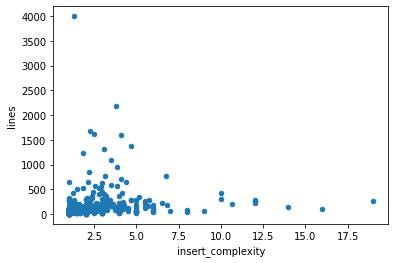

In [50]:
upstream.plot.scatter(x ='insert_complexity' , y='lines')#, logy=True)

## Overview
Let us look at the pairwise relationships of the numerical measures we have so far.

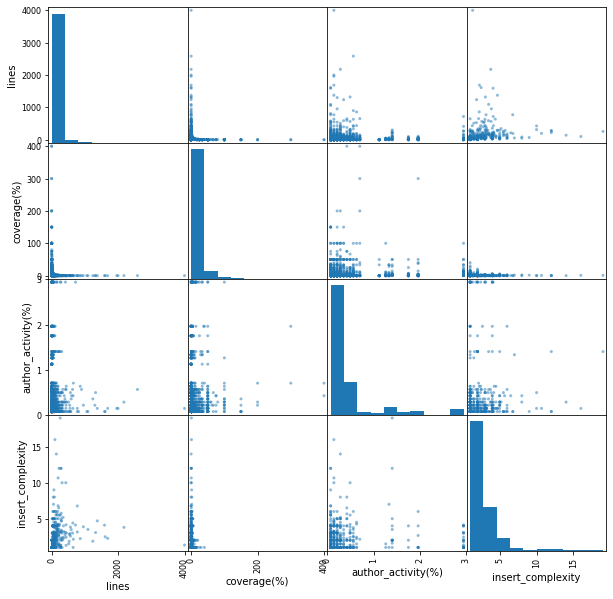

In [51]:
# is there something like ggpairs?
ax = pd.plotting.scatter_matrix(\
        upstream[['lines', 'coverage(%)', 'author_activity(%)', 'insert_complexity']],\
                               figsize=(10, 10))